# Overview

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

In [ ]:
# Data wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set.csv')

Saving 2019 Winter Data Science Intern Challenge Data Set.csv to 2019 Winter Data Science Intern Challenge Data Set (3).csv


In [ ]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [ ]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


As we can see from the 25% quantile, 50% quantile (median), and 75% quantile, the majority of `order_amount` are below \\$390. The mean of `order_amount`, howerver, is \\$3145.13. Something doesn't seem right here, and we should delve deeper into this.

We first use a boxplot to confirm our belieft: `order_amount` has a right-skewed distribution, and it's mean is heavily impacted by outliers.

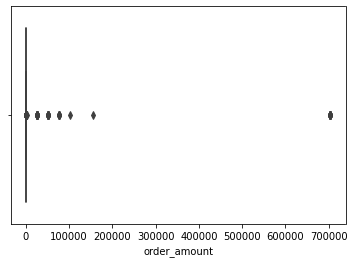

In [ ]:
sns.boxplot(x = df.order_amount)
# The result shows that 1 to 3 quantiles are close to the left of the distribution. 

We also want to check if there are any duplicates that cause wrong interpretation of the dataset.

In [ ]:
df.groupby(['user_id', 'order_amount']).size().sort_values(ascending = False).head()

user_id  order_amount
607      704000          17
774      352              4
903      352              3
848      256              3
787      352              3
dtype: int64

From the table above, we see that user_id 607 has 17 orders with a signigicant order amount. Let's take a closer look at this user.

In [ ]:
df.loc[df.user_id == 607]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


The result shows that the same user, user_id 607, has been making orders with same `order_amount` and `order_items` at the same time, 4:00:00. The only difference is the date. Our analysis team would want to investigate into this to make sure there is no system glitches that keep creating duplicated orders.

## 1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

As we saw from the right-skewed distribution, **the outliers on the right of the 3-quantile will lead to our mean calculation being highly overestimated**. In addition, **having duplicated orders in the dataset will also cause inaccurate AOV.** The better way would be using the median order value (MOV) to evaluate this data, as it is less biased even when there are outliers.

We can also use quantiles to segment the data and study different MOV in different segmentations if we want to come up with marketing strategies. For instance, orders in the first quantile will have lower MOV than orders in the third quantile; therefore, different groups will have different willingless-to-pay. Knowing various MOVs in distinct groups will help us better target potential customers.

## 2. What metric would you report for this dataset?

The metric I would report for this dataset would be the median order value (second-quantile).

## 3. What is its value?

The median order value is $284.

## Additional marketing strategies

As I mentioned, we can group orders and identify what would be an acceptable price for different clients.

In [ ]:
df_sorted = df.sort_values('order_amount')
df_sorted.reset_index(drop = True, inplace = True)
df_sorted.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,159,92,795,90,1,credit_card,2017-03-29 3:07:12
1,3872,92,818,90,1,debit,2017-03-18 9:10:08
2,4761,92,937,90,1,debit,2017-03-20 7:37:28
3,4924,92,965,90,1,credit_card,2017-03-09 5:05:11
4,4933,92,823,90,1,credit_card,2017-03-24 2:17:13


In [ ]:
len(df_sorted)/4

1250.0

In [ ]:
Q1 = df_sorted.iloc[:1250, :]
Q2 = df_sorted.iloc[1250:2500, :]
Q3 = df_sorted.iloc[2500:3750, :]
Q4 = df_sorted.iloc[3750:, :]

In [ ]:
Q1.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.0
mean,2533.816800,48.509600,853.172800,137.856800,1.0
std,1430.595142,29.543665,84.335023,17.910447,0.0
min,2.000000,1.000000,700.000000,90.000000,1.0
25%,1331.500000,21.000000,784.000000,128.000000,1.0
50%,2537.000000,48.000000,855.000000,139.000000,1.0
75%,3803.000000,72.000000,924.000000,153.000000,1.0
max,4992.000000,100.000000,999.000000,163.000000,1.0


In [ ]:
Q2.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
mean,2496.844000,49.886400,851.220800,219.730400,1.572000
std,1485.275367,28.651964,88.002743,41.621134,0.512471
min,1.000000,2.000000,700.000000,163.000000,1.000000
25%,1196.250000,26.000000,777.250000,178.000000,1.000000
50%,2488.000000,50.000000,852.000000,224.000000,2.000000
75%,3797.750000,71.000000,928.750000,260.000000,2.000000
max,4997.000000,100.000000,999.000000,284.000000,3.000000


In [ ]:
Q3.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
mean,2509.822400,49.663200,846.350400,333.408000,2.125600
std,1421.987432,29.205783,87.918408,28.009062,0.376747
min,8.000000,1.000000,700.000000,284.000000,1.000000
25%,1248.000000,23.000000,770.000000,312.000000,2.000000
50%,2522.000000,50.000000,845.000000,328.000000,2.000000
75%,3696.750000,76.000000,923.000000,354.000000,2.000000
max,5000.000000,100.000000,999.000000,390.000000,4.000000


In [ ]:
Q4.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,1250.00000,1250.000000,1250.000000,1250.000000,1250.000000
mean,2461.51680,52.256000,845.625600,11889.516800,30.451200
std,1436.16824,28.518084,90.696667,81969.686312,231.358714
min,15.00000,1.000000,607.000000,390.000000,1.000000
25%,1205.50000,27.000000,774.000000,459.000000,3.000000
50%,2455.00000,54.000000,845.500000,507.000000,3.000000
75%,3689.25000,78.000000,926.000000,590.000000,4.000000
max,4990.00000,100.000000,999.000000,704000.000000,2000.000000


From the analysis above, we can clear see that different segments have distinct MOVs, and they can be used to create effective marketing strategies.

Q1 = \$139: 
The first segment can only accept price range close to \$140.

Q2 = \$224:
The second segment can accept price range close to \$225.

Q3 = \$328:
The third segment can accept price range close to \$330.

Q4 = \$507:
And the four segment can afford sneakers more expensive than \$500.

The marketing team can use this information to decide what pricing strategies they want to apply to each customer segmentation.